In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from helper import get_MNIST
((X_train, y_train), (X_valid, y_valid)) = get_MNIST()

In [3]:
from fastai.basics import *

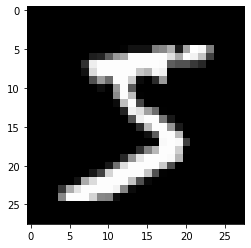

In [4]:
image = X_train[0].reshape(28, 28)
plt.imshow(image, cmap='gray')

In [5]:
# map the data into tensors 
X_train, y_train, X_valid, y_valid = map(torch.tensor, (X_train, y_train, X_valid, y_valid))
n, c = X_train.shape
X_train.shape, y_train.min(), y_train.max()

(torch.Size([50000, 784]), tensor(0), tensor(9))

In [6]:
bs = 64
lr = 2e-2
train_ds = TensorDataset(X_train, y_train)
valid_ds = TensorDataset(X_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs=bs)

In [7]:
loss_function = nn.CrossEntropyLoss()

In [8]:
class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 50, bias=True)
        self.lin2 = nn.Linear(50, 10, bias=True)
    
    def forward(self, xb):
        x = self.lin1(xb)
        x = F.relu(x)
        return self.lin2(x)

In [9]:
def update(x,y,lr):
    wd = 1e-5
    y_hat = model(x)
    
    # Weight Decay
    w2 = 0.
    for p in model.parameters(): w2 += (p**2).sum()
    
    loss = loss_function(y_hat, y) + w2*wd
    loss.backward()
    with torch.no_grad():
        for p in model.parameters():
            p.sub_(lr*p.grad)
            p.grad.zero_()
    return loss.item()

In [10]:
model = Mnist_NN().cuda()

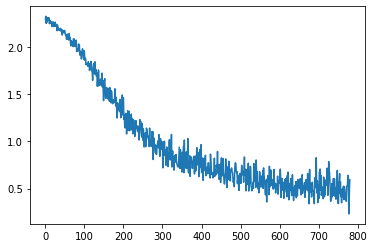

In [11]:
losses = [update(x,y,lr) for x, y in data.train_dl]
plt.plot(losses)

In [15]:
v = 0
v = tensor(v)
def update(x,y,lr):
    global v
    wd = 1e-5
    mu = 0.9
    
    y_hat = model(x)
    
    # Weight Decay
    w2 = 0.
    for p in model.parameters(): w2 += (p**2).sum()
    
    loss = loss_function(y_hat, y) + w2*wd
    loss.backward()
    with torch.no_grad():
#         for p in model.parameters():
#             v = mu * v - lr * p.grad
#             p.sub_(v)
#             p.grad.zero_()
        grads = [p.grad.view(-1) for p in model.parameters()]    
        grads = torch.cat(grads)
        parameters = [p for p in model.parameters()]
        parameters = torch.cat(parameters)
        v = mu * v + lr * grads / bs
        parameters.sub_(v)
        parameters.zero_()
            
    return loss.item()

In [16]:
model = Mnist_NN().cuda()

In [17]:
losses = [update(x,y,lr) for x, y in data.train_dl]
plt.plot(losses)

RuntimeError: invalid argument 0: Tensors must have same number of dimensions: got 1 and 2 at /opt/conda/conda-bld/pytorch_1565272271120/work/aten/src/THC/generic/THCTensorMath.cu:62